# Brazil Customer Satisfaction Prediction

#### Imports

In [1]:
import os
import numpy as np
import pandas as pd
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

/Users/nicolebrye/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.0' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/nicolebrye/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:62: UserWarning: Pandas requires version '1.3.4' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


#### Reading in the data

In [2]:
# Data ordering:
# [0] Sellers
# [1] Category name translation
# [2] Orders
# [3] Order Items
# [4] Customers
# [5] Geolocation
# [6] Order Payments
# [7] Order Reviews
# [8] Products

files = os.listdir(os.path.join(os.getcwd(), 'data'))

DF = []
for f in files:
    DF.append(pd.read_csv(f'data/{f}'))

#### Merging

In [3]:
# Orders dataset (main)
orders = DF[2]
orders.head()

# Merge order dataset and order item dataset
order_items = DF[3]
temp1 = pd.merge(orders, order_items, how='left', on='order_id')

In [4]:
# Merge the combinded dataset with order reviews
order_reviews = DF[7]

temp2 = pd.merge(temp1, order_reviews, how='left', on='order_id')

In [5]:
# Merge the combined dataset with the products table
products = DF[8]

temp3 = pd.merge(temp2, products, how='left', on='product_id')

In [6]:
# Merge the combined datatset with the customer dataset
customers = DF[4]

temp4 = pd.merge(temp3, customers, how='left', on='customer_id')

In [7]:
# Merge the combined dataset with the sellers dataset
sellers = DF[0]

temp5 = pd.merge(temp4, sellers, how='left', on='seller_id')

In [8]:
# Merge the combined dataset with the geolocation dataset
geolocation = DF[5]

geo_clean = geolocation.drop(
    columns=['geolocation_city', 'geolocation_state']).groupby(
    'geolocation_zip_code_prefix').mean()

temp6 = pd.merge(temp5, geo_clean, how='left', 
                 left_on='customer_zip_code_prefix',
                 right_on='geolocation_zip_code_prefix')

In [9]:
# Merge the combined dataset with the seller geolocation

merged_df = pd.merge(temp6, geo_clean, how='left', 
                 left_on='seller_zip_code_prefix',
                 right_on='geolocation_zip_code_prefix',
                 suffixes=('_customer', '_seller'))
merged_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,customer_zip_code_prefix,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state,geolocation_lat_customer,geolocation_lng_customer,geolocation_lat_seller,geolocation_lng_seller
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,3149,sao paulo,SP,9350.0,maua,SP,-23.576983,-46.587161,-23.680729,-46.444238
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1.0,595fac2a385ac33a80bd5114aec74eb8,...,47813,barreiras,BA,31570.0,belo horizonte,SP,-12.177924,-44.660711,-19.807681,-43.980427
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1.0,aa4383b373c6aca5d8797843e5594415,...,75265,vianopolis,GO,14840.0,guariba,SP,-16.745150,-48.514783,-21.363502,-48.229601
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,...,59296,sao goncalo do amarante,RN,31842.0,belo horizonte,MG,-5.774190,-35.271143,-19.837682,-43.924053
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,1.0,65266b2da20d04dbe00c5c2d3bb7859e,...,9195,santo andre,SP,8752.0,mogi das cruzes,SP,-23.676370,-46.514627,-23.543395,-46.262086


#### Dropping columns

In [10]:
# Columns to remove
rem_cols = ['order_id', 'customer_id', 'order_item_id', 'product_id',
            'seller_id', 'review_id', 'review_comment_title',
            'review_comment_message', 'review_creation_date',
            'review_answer_timestamp', 'product_name_lenght',
            'product_description_lenght', 'customer_unique_id',
            'customer_city', 'customer_state', 'seller_city',
            'seller_state', 'shipping_limit_date', 'product_photos_qty'
           ]

merged_df = merged_df.drop(columns = rem_cols)
merged_df.head()

,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,price,freight_value,review_score,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_zip_code_prefix,seller_zip_code_prefix,geolocation_lat_customer,geolocation_lng_customer,geolocation_lat_seller,geolocation_lng_seller
0,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,29.99,8.72,4.0,utilidades_domesticas,500.0,19.0,8.0,13.0,3149,9350.0,-23.576983,-46.587161,-23.680729,-46.444238
1,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,118.70,22.76,4.0,perfumaria,400.0,19.0,13.0,19.0,47813,31570.0,-12.177924,-44.660711,-19.807681,-43.980427
2,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,159.90,19.22,5.0,automotivo,420.0,24.0,19.0,21.0,75265,14840.0,-16.745150,-48.514783,-21.363502,-48.229601
3,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,45.00,27.20,5.0,pet_shop,450.0,30.0,10.0,20.0,59296,31842.0,-5.774190,-35.271143,-19.837682,-43.924053
4,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,19.90,8.72,5.0,papelaria,250.0,51.0,15.0,15.0,9195,8752.0,-23.676370,-46.514627,-23.543395,-46.262086


#### Handling dates and times

In [11]:
time_cols = list(merged_df.columns[merged_df.columns.str.endswith('date')])
time_cols = ['order_purchase_timestamp', 'order_approved_at'] + time_cols

In [12]:
for col in time_cols:
    merged_df[col] = pd.to_datetime(merged_df[col], format='%Y-%m-%d %H:%M:%S')

In [13]:
merged_df['approval_time'] = (
    merged_df['order_approved_at'] - merged_df['order_purchase_timestamp']
)
merged_df['approval_time'] = merged_df['approval_time'].dt.total_seconds() / 3600

# Time to package
merged_df['packaging_time'] = (
    merged_df['order_delivered_carrier_date'] - merged_df['order_approved_at']
)
merged_df['packaging_time'] = merged_df['packaging_time'].dt.total_seconds() / 3600

# # Delivery time
merged_df['delivery_time'] = (
    merged_df['order_delivered_customer_date'] - merged_df['order_delivered_carrier_date']
)
merged_df['delivery_time'] = merged_df['delivery_time'].dt.total_seconds() / 3600


# Delivery delay (could be negative if package shipped early)
merged_df['delivery_delay'] = (
    merged_df['order_delivered_customer_date'] - merged_df['order_estimated_delivery_date']
)
merged_df['delivery_delay'] = merged_df['delivery_delay'].dt.total_seconds() / 3600


merged_df = merged_df.drop(columns = time_cols)

#### Location distances

In [14]:
merged_df['product_volume_cm3'] = (
    merged_df['product_height_cm'] * merged_df['product_length_cm'] 
    * merged_df['product_width_cm']
)

In [17]:
dist_df = merged_df.copy()

gdf1 = gpd.GeoDataFrame(
    dist_df, geometry=gpd.points_from_xy(dist_df['geolocation_lng_customer'], 
                                      dist_df['geolocation_lat_customer']), 
    crs="EPSG:4326"
)

gdf2 = gpd.GeoDataFrame(
    dist_df, geometry=gpd.points_from_xy(dist_df['geolocation_lng_seller'], 
                                      dist_df['geolocation_lat_seller']), 
    crs="EPSG:4326"
)


In [18]:
gdf1 = gdf1.to_crs('EPSG:5234')
gdf2 = gdf2.to_crs('EPSG:5234')

dist_df['distance_km'] = gdf1.distance(gdf2) / 1000

In [24]:
dist_df[dist_df['geolocation_lat_customer'] > 0]

,order_status,price,freight_value,review_score,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_zip_code_prefix,...,geolocation_lat_customer,geolocation_lng_customer,geolocation_lat_seller,geolocation_lng_seller,approval_time,packaging_time,delivery_time,delivery_delay,product_volume_cm3,distance_km
31,delivered,30.10,33.24,4.0,ferramentas_jardim,850.0,20.0,20.0,20.0,69317,...,2.822592,-60.754147,-25.501031,-49.333140,0.951389,31.687500,697.006667,-384.512778,8000.0,35558.430599
237,delivered,189.90,26.36,3.0,telefonia,450.0,17.0,3.0,11.0,68906,...,0.036307,-51.095214,-12.893167,-38.337875,0.158056,71.665833,556.108056,-650.601944,561.0,37235.164339
847,delivered,67.99,25.60,5.0,automotivo,4900.0,69.0,19.0,41.0,83252,...,42.184003,-8.723762,-26.232194,-49.411882,0.163333,15.545278,638.944444,268.077778,53751.0,25804.261479
2341,delivered,122.99,27.92,5.0,NaN,400.0,20.0,12.0,15.0,69307,...,2.855558,-60.660713,-23.436711,-46.511340,0.650556,37.154444,646.833611,-313.854444,3600.0,35668.465623
5143,shipped,39.99,31.67,1.0,moveis_decoracao,1400.0,32.0,6.0,28.0,69309,...,2.813746,-60.701007,-22.430218,-46.573405,784.045556,263.946667,NaN,NaN,5376.0,35827.236221
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110454,delivered,69.90,47.02,1.0,cama_mesa_banho,1150.0,30.0,10.0,30.0,69316,...,2.779962,-60.734700,-21.757321,-48.829744,15.575000,52.444444,1706.358056,715.642778,9000.0,36067.050157
111059,delivered,119.90,29.24,1.0,beleza_saude,1900.0,27.0,9.0,18.0,68275,...,22.567952,-27.698087,-21.254548,-47.815291,0.702500,121.203056,492.852222,-375.017222,4374.0,30706.978422
112193,delivered,89.90,81.79,4.0,esporte_lazer,353.0,23.0,15.0,16.0,69380,...,3.362115,-59.833222,-23.382472,-51.927966,0.453333,51.151667,389.073056,-941.543611,5520.0,35914.995662
113056,delivered,385.00,40.24,5.0,eletronicos,600.0,22.0,6.0,20.0,68980,...,3.842508,-51.833958,-23.547054,-46.929721,0.184444,80.774167,649.035000,8.648333,2640.0,35434.597760


In [42]:
from shapely.geometry import Point
pnt2 = Point(-51.095214, 0.036307)
pnt1 = Point(-38.337875, -12.893167)
points_df = gpd.GeoDataFrame({'geometry': [pnt1, pnt2]}, crs='EPSG:4326')
points_df = points_df.to_crs('EPSG:5234')
points_df2 = points_df.shift() #We shift the dataframe by 1 to align pnt1 with pnt2
dist = points_df.distance(points_df2)
dist.iloc[1]

3401298.542339653

In [40]:
37235164 / 1000

37235.164

In [36]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))

/var/folders/7m/n2zn61593k18rvyz907d2skc0000gn/T/ipykernel_36076/4025677638.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
/var/folders/7m/n2zn61593k18rvyz907d2skc0000gn/T/ipykernel_36076/4025677638.py:3: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_cities' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))


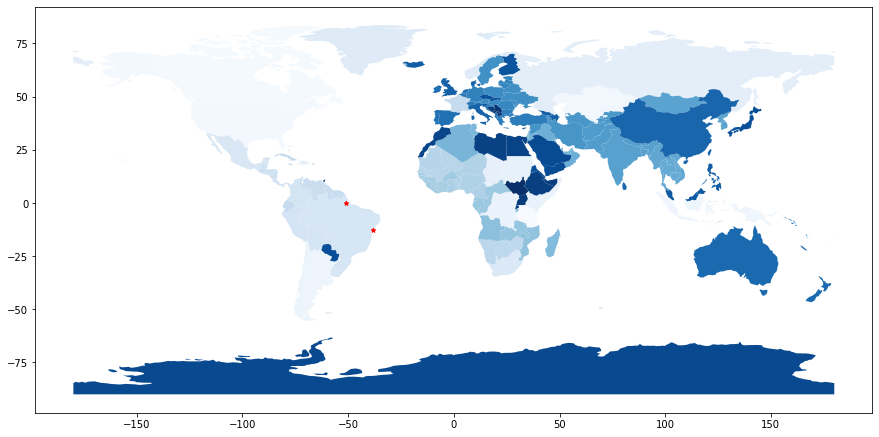

In [37]:
pgdf1 = points_df.to_crs('EPSG:4326')

fig,ax = plt.subplots(figsize = (15,15))
world.plot(ax=ax, cmap='Blues')
g = pgdf1.plot(ax = ax, markersize = 20, color = 'red',marker = '*')


plt.show()

<AxesSubplot:>

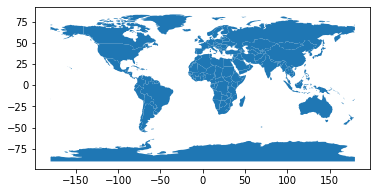

In [31]:
world.plot()

<AxesSubplot:>

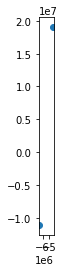

In [32]:
points_df.plot()

#### Handle Missing Values

In [260]:
dist_df.isnull().sum()/len(dist_df)

order_status                0.000000
price                       0.006819
freight_value               0.006819
review_score                0.008423
product_category_name       0.020948
product_weight_g            0.006977
product_length_cm           0.006977
product_height_cm           0.006977
product_width_cm            0.006977
customer_zip_code_prefix    0.000000
seller_zip_code_prefix      0.006819
geolocation_lat_customer    0.002726
geolocation_lng_customer    0.002726
geolocation_lat_seller      0.009072
geolocation_lng_seller      0.009072
approval_time               0.001420
packaging_time              0.017486
delivery_time               0.028521
delivery_delay              0.028512
product_volume_cm3          0.006977
distance_km                 0.011754
dtype: float64

In [44]:
# Gameplan
# DROP EVERYTHAAAANG YAAAS
# Drop rows with missing geolocations, zip code, and distance
# Drop rows with missing category names
# Impute price using category
# Drop rows with missing review scores (because this is the target)
# Drop missing product dimensions and freight values
# Imput times using the mean for the category

imp_cols = ['approval_time', 'packaging_time', 'delivery_time', 'delivery_delay',
            'price']

drop_cols = dist_df.columns[~dist_df.columns.isin(imp_cols),]

s_imp = SimpleImputer()
s_imp.fit(dist_df[imp_cols])
dist_df[imp_cols] = s_imp.transform(dist_df[imp_cols])

clean_df = dist_df.dropna()

#### Visualizations

In [45]:
# The gameplan
# 
# Scatterplots for numerical features with the target
# lots of bar plots essentially
sns.set_style(style='darkgrid')

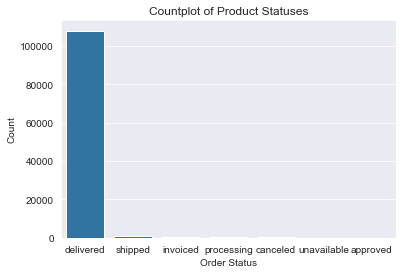

In [46]:
sns.countplot(data=clean_df, x='order_status')
plt.title('Countplot of Product Statuses')
plt.xlabel('Order Status')
plt.ylabel('Count')
plt.show()

False


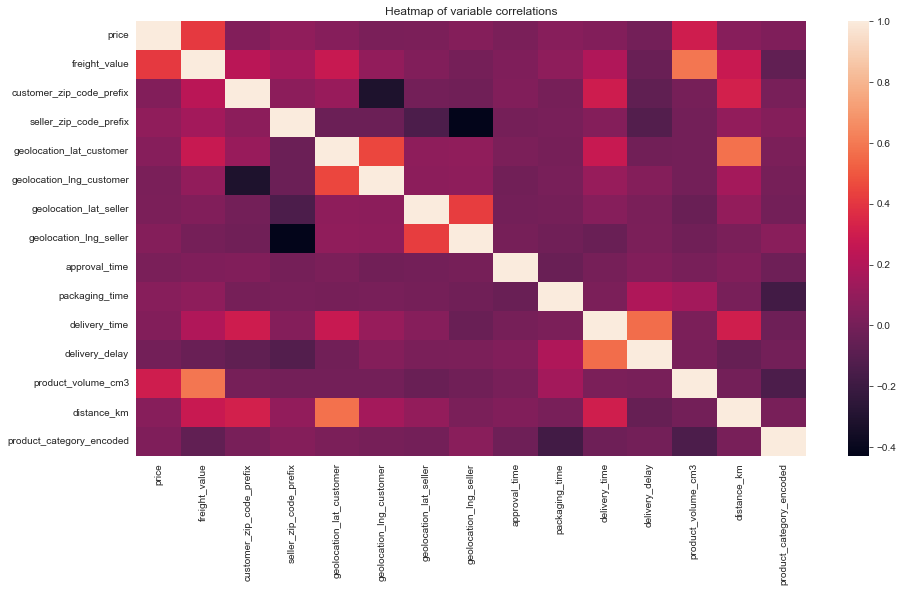

In [111]:
# Correlation Heatmap

feats = clean_df.copy()
feats = feats.drop(columns = ['product_width_cm', 'product_length_cm', 'product_height_cm',
                              'product_weight_g'])

num_cols = feats.columns[~feats.columns.isin(
    ['order_status', 'product_category_name', 'review_score']
)]

correlation = feats[num_cols].corr()
print(((correlation >= 0.8) & (correlation < 1.0)).any().any())

plt.figure(figsize = (15, 8))
sns.heatmap(clean_df[num_cols].corr())
plt.title('Heatmap of variable correlations')
plt.show()

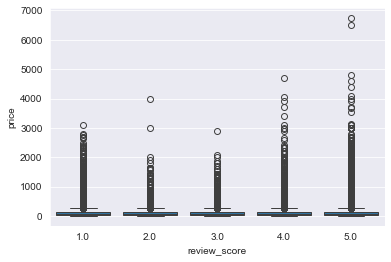

In [112]:
#clean_df['log_price'] = np.log(clean_df['price'])
ax = sns.boxplot(data=feats, x='review_score', y='price')

/Users/nicolebrye/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/nicolebrye/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


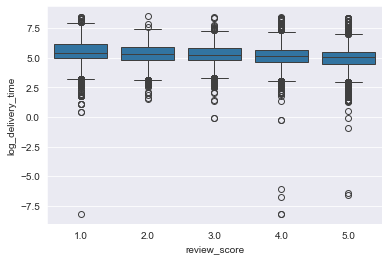

In [113]:
feats['log_delivery_time'] = np.log(feats['delivery_time'])
ax = sns.boxplot(data=feats, x='review_score', y='log_delivery_time')


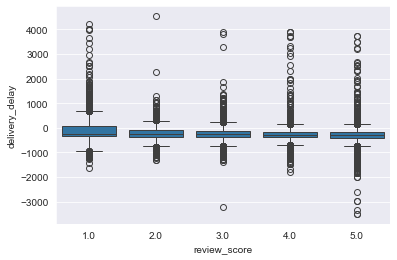

In [114]:
ax = sns.boxplot(data=feats, x='review_score', y='delivery_delay')

In [115]:
# world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# # We restrict to South America.
# ax = world[world.continent == 'South America'].plot(
#     color='white', edgecolor='black')

# # We can now plot our GeoDataFrame.
# # gdf1.plot(ax=ax, color='red')

# plt.figure(figs)
# plt.show()

#### Encodings

#### Splitting up the work

In [ ]:
# Liang: EDAV
# Akshat: Encodings
# Ishita: EDAV
# Nicole: Figure out the geoplot
# Armin: Review the code and prepare slides
# ALL: work on the slides

In [116]:
# Tables Brasil and states
uf_br0 = gpd.read_file('/Users/nicolebrye/Downloads/gadm36_BRA_shp' + '/gadm36_BRA_0.shp')
uf_br1 = gpd.read_file('/Users/nicolebrye/Downloads/gadm36_BRA_shp' + '/gadm36_BRA_1.shp')

In [118]:
pgdf1 = gdf1.to_crs('EPSG:4326')
pgdf2 = gdf2.to_crs('EPSG:4326')

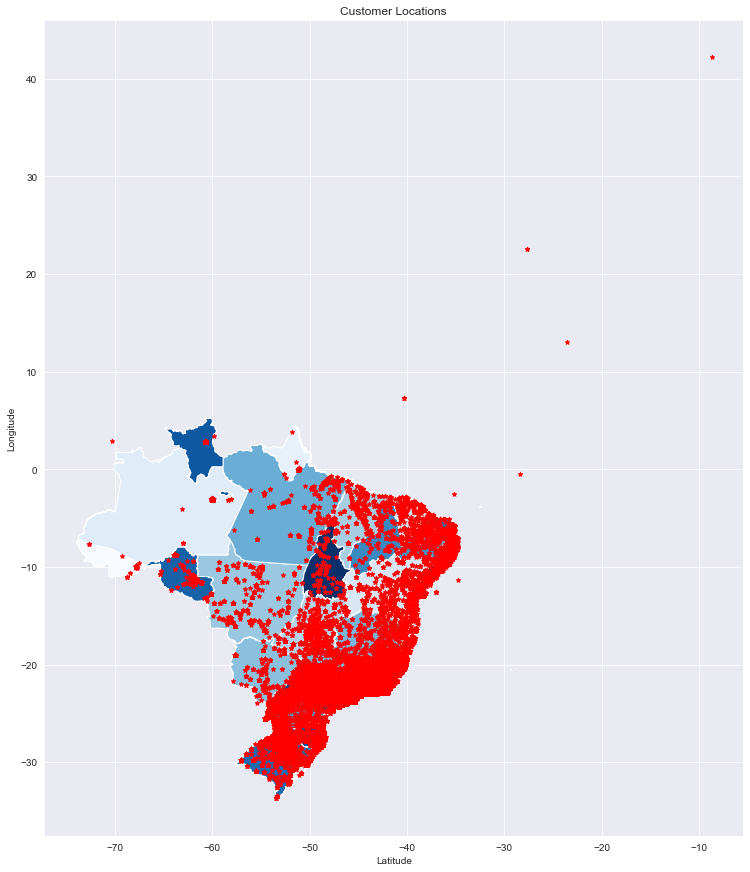

In [126]:
#plt.figure(figsize=(20, 10))
# crs={'init':'epsg:4326'}

fig,ax = plt.subplots(figsize = (15,15))
uf_br1.plot(ax=ax, cmap='Blues')
g = pgdf1.plot(ax = ax, markersize = 20, color = 'red',marker = '*')

plt.title('Customer Locations')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()


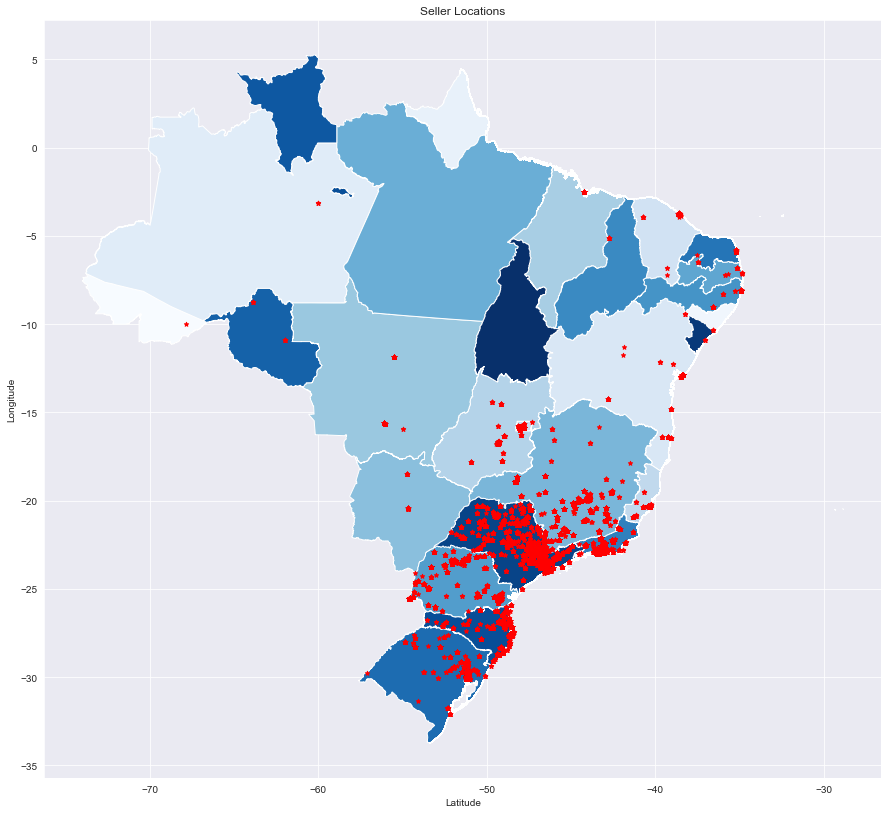

In [125]:
fig,ax = plt.subplots(figsize = (15,15))
uf_br1.plot(ax=ax, cmap='Blues')
g = pgdf2.plot(ax = ax, markersize = 20, color = 'red',marker = '*')

plt.title('Seller Locations')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()

#### Encodings

In [121]:
enc = feats.copy()

In [122]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse_output=False, drop='first')

delivery_status_encoded = ohe.fit_transform(enc[['order_status']])

delivery_status_encoded_df = pd.DataFrame(delivery_status_encoded, 
                                          columns = enc['order_status'].unique()[1:])

temp1 = enc.reset_index(drop=True)
temp2 = pd.concat([temp1, delivery_status_encoded_df], axis=1)

#clean_df = clean_df.drop(columns=['order_status'])

print(enc.head())
#from category_encoders import TargetEncoder
from sklearn.preprocessing import TargetEncoder

target_encoder = TargetEncoder(target_type="continuous")
enc['product_category_encoded'] = target_encoder.fit_transform(enc['product_category_name'].to_frame(), 
                                                                    enc['review_score'])
print(enc.head())

  order_status   price  freight_value  review_score  product_category_name  \
0    delivered   29.99           8.72           4.0  utilidades_domesticas   
1    delivered  118.70          22.76           4.0             perfumaria   
2    delivered  159.90          19.22           5.0             automotivo   
3    delivered   45.00          27.20           5.0               pet_shop   
4    delivered   19.90           8.72           5.0              papelaria   

   customer_zip_code_prefix  seller_zip_code_prefix  geolocation_lat_customer  \
0                      3149                  9350.0                -23.576983   
1                     47813                 31570.0                -12.177924   
2                     75265                 14840.0                -16.745150   
3                     59296                 31842.0                 -5.774190   
4                      9195                  8752.0                -23.676370   

   geolocation_lng_customer  geolocation_lat